<a href="https://colab.research.google.com/github/kleeresearch/TextAnalysis/blob/master/Course/Day1/5_Copy_of_En_frequency_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install wordcloud

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
with open('/content/drive/MyDrive/KOSSDA_텍스트마이닝_강의자료/강의자료/Day1/python_code/nytimes.txt', 'r', encoding='utf8') as f:
    content = f.read()

content

' Hurray for the HotBlack Coffee cafe in Toronto for declining to offer Wi-Fi to its customers. There are other such cafes, to be sure, including seven of the eight New York City locations of Café Grumpy. But it’s HotBlack’s reason for the electronic blackout that is cause for hosannas. As its president, Jimson Bienenstock, explained, his aim is to get customers to talk with one another instead of being buried in their portable devices. “It’s about creating a social vibe,” he told a New York Times reporter. “We’re a vehicle for human interaction, otherwise it’s just a commodity.” What a novel idea! Perhaps Mr. Bienenstock instinctively knows what medical science has been increasingly demonstrating for decades: Social interaction is a critically important contributor to good health and longevity. Personally, I don’t need research-based evidence to appreciate the value of making and maintaining social connections. I experience it daily during my morning walk with up to three women, then 

In [5]:
import nltk
from nltk.corpus import stopwords
import re

In [6]:
def do_En_preprocessing(text, customized_stopwords):
    cleaned_content = re.sub(r'[^\w\d\s]','',text) # To remove symbols
    cleaned_content = cleaned_content.lower() # Case conversion, upper -> lower
    word_tokens = nltk.word_tokenize(cleaned_content) # Tokenization
    tokens_pos = nltk.pos_tag(word_tokens) # POS tagging
    NN_words = []   # To select nouns
    for word, pos in tokens_pos:
        if 'NN' in pos:
            NN_words.append(word)

    wlem = nltk.WordNetLemmatizer()   # Lemmatization
    lemmatized_words = []
    for word in NN_words:
        lemmatized_words.append(wlem.lemmatize(word))
    # 불용어 제거
    stopwords_list = stopwords.words('english')
    unique_NN_words = set(lemmatized_words)
    final_NN_words = lemmatized_words.copy()
    for word in unique_NN_words:
        if word in stopwords_list:
            while word in final_NN_words:
                final_NN_words.remove(word)

    unique_NN_words1 = set(final_NN_words)
    for word in unique_NN_words1:
        if word in customized_stopwords:
            while word in final_NN_words:
                final_NN_words.remove(word)

    return final_NN_words

In [7]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
customized_stopwords = ['york', 'time', 'news']

In [9]:
final_words = do_En_preprocessing(content, customized_stopwords)
print(final_words)

['hurray', 'hotblack', 'coffee', 'cafe', 'toronto', 'wifi', 'customer', 'cafe', 'city', 'location', 'café', 'grumpy', 'hotblacks', 'reason', 'blackout', 'cause', 'hosanna', 'president', 'jimson', 'bienenstock', 'aim', 'customer', 'device', 'vibe', 'vehicle', 'interaction', 'commodity', 'idea', 'bienenstock', 'science', 'decade', 'interaction', 'contributor', 'health', 'longevity', 'evidence', 'value', 'connection', 'morning', 'walk', 'woman', 'swim', 'locker', 'room', 'ymca', 'use', 'device', 'locker', 'room', 'experience', 'friend', 'share', 'joy', 'woman', 'problem', 'board', 'advice', 'counsel', 'laugh', 'brightens', 'day', 'study', 'life', 'harvard', 'health', 'watch', 'dozen', 'study', 'people', 'relationship', 'family', 'friend', 'community', 'health', 'problem', 'longer', 'study', 'men', 'woman', 'county', 'calif', 'lisa', 'berkman', 'leonard', 'syme', 'people', 'others', 'nineyear', 'study', 'people', 'tie', 'robbins', 'book', 'health', 'longevity', 'difference', 'survival', 'p

## Frequency analysis using Counter

In [10]:
from collections import Counter
c = Counter(final_words)
print(c)

Counter({'health': 11, 'people': 11, 'researcher': 7, 'study': 6, 'tie': 6, 'interaction': 5, 'friend': 4, 'others': 4, 'exercise': 4, 'connection': 3, 'woman': 3, 'problem': 3, 'lifestyle': 3, 'lack': 3, 'heart': 3, 'death': 3, 'connectedness': 3, 'disease': 3, 'research': 3, 'inflammation': 3, 'texas': 3, 'seppala': 3, 'cafe': 2, 'customer': 2, 'reason': 2, 'bienenstock': 2, 'device': 2, 'longevity': 2, 'evidence': 2, 'locker': 2, 'room': 2, 'life': 2, 'men': 2, 'robbins': 2, 'book': 2, 'practice': 2, 'obesity': 2, 'habit': 2, 'journal': 2, 'risk': 2, 'university': 2, 'center': 2, 'condition': 2, 'mortality': 2, 'loneliness': 2, 'isolation': 2, 'blood': 2, 'pressure': 2, 'level': 2, 'stress': 2, 'wellbeing': 2, 'report': 2, 'behavior': 2, 'percent': 2, 'hurray': 1, 'hotblack': 1, 'coffee': 1, 'toronto': 1, 'wifi': 1, 'city': 1, 'location': 1, 'café': 1, 'grumpy': 1, 'hotblacks': 1, 'blackout': 1, 'cause': 1, 'hosanna': 1, 'president': 1, 'jimson': 1, 'aim': 1, 'vibe': 1, 'vehicle': 1

In [11]:
c.most_common(10)

[('health', 11),
 ('people', 11),
 ('researcher', 7),
 ('study', 6),
 ('tie', 6),
 ('interaction', 5),
 ('friend', 4),
 ('others', 4),
 ('exercise', 4),
 ('connection', 3)]

In [12]:
final_words

['hurray',
 'hotblack',
 'coffee',
 'cafe',
 'toronto',
 'wifi',
 'customer',
 'cafe',
 'city',
 'location',
 'café',
 'grumpy',
 'hotblacks',
 'reason',
 'blackout',
 'cause',
 'hosanna',
 'president',
 'jimson',
 'bienenstock',
 'aim',
 'customer',
 'device',
 'vibe',
 'vehicle',
 'interaction',
 'commodity',
 'idea',
 'bienenstock',
 'science',
 'decade',
 'interaction',
 'contributor',
 'health',
 'longevity',
 'evidence',
 'value',
 'connection',
 'morning',
 'walk',
 'woman',
 'swim',
 'locker',
 'room',
 'ymca',
 'use',
 'device',
 'locker',
 'room',
 'experience',
 'friend',
 'share',
 'joy',
 'woman',
 'problem',
 'board',
 'advice',
 'counsel',
 'laugh',
 'brightens',
 'day',
 'study',
 'life',
 'harvard',
 'health',
 'watch',
 'dozen',
 'study',
 'people',
 'relationship',
 'family',
 'friend',
 'community',
 'health',
 'problem',
 'longer',
 'study',
 'men',
 'woman',
 'county',
 'calif',
 'lisa',
 'berkman',
 'leonard',
 'syme',
 'people',
 'others',
 'nineyear',
 'study',

In [13]:
' '.join(final_words)

'hurray hotblack coffee cafe toronto wifi customer cafe city location café grumpy hotblacks reason blackout cause hosanna president jimson bienenstock aim customer device vibe vehicle interaction commodity idea bienenstock science decade interaction contributor health longevity evidence value connection morning walk woman swim locker room ymca use device locker room experience friend share joy woman problem board advice counsel laugh brightens day study life harvard health watch dozen study people relationship family friend community health problem longer study men woman county calif lisa berkman leonard syme people others nineyear study people tie robbins book health longevity difference survival people age gender health practice health status fact researcher tie lifestyle obesity lack exercise tie living habit robbins people lifestyle tie study journal medicine researcher health insurance plan men heart attack connection people quarter risk death year connectedness researcher duke un

## Word cloud

직사각형 형태로 시각화 해보기

지정된 파라미터값으로 객체 wordcloud를 만들었다. generate 펑션을 사용하면 리스트 데이터가 된다. 하나의 문자값을 입력값으로 받는다. 문자열 형태의 데이터로 변환을 해줘야 한다. 문자열 데이터를 생성해줘야 한다. 파이썬에서 기본적으로 제공되는 문자열 중에서 조인 펑션을 써야 한다. 서로 다른 문자열 값들을 서로 연결해줘서 하나의 새로운 문자열 데이터를 생성해줘야 한다. 각가의 단어들을 조인 앞에 점 앞에 띄어쓰기를 이용해서 연결해서 하나의 새로운 문자열 데이터를 생성하게 된다.

클래스는 여러 펑션을 가지고 있음. 일단 객체를 만들어야 한다. 객체를 만들 때는 클래스에 생성자 함수를 사용한다. 생성자 함수를 이용해서 객체를 만드는데 클래스 이름과 동일한 이름을 가진다. 워드 클라우드라고 하는 생성자 함수를 쓴다. 경우에 따라서는 폰트사이즈를 정의를 한다. font_path=FONT_PATH.

생성자 함수를 이용해서 객체를 만들고 시각화하는 작업이 generate 이라고 하는 펑션이다. generate은 단어들로 구성된 리스트 펑션이다. generate 펑션은 문자열 데이터여야 한다. join 펑션은 여러개의 단어들, 문자열 값을 이용해서 연결해서 하나의 데이터로 사용하는 문자열 함수가 된다. 각각의 단어가 명사다. 하나의 문자열 데이터로 변환시켜야 한다. 띄어쓰기를 기준으로 join 펑션을 사용하게 되면 하나의 문자열 데이터가 된다. 워드클라우드에 시각화하기 위한 generate 펑션으로 입력하면 된다.

워드클라우드 시각화 결과를 보여준다.

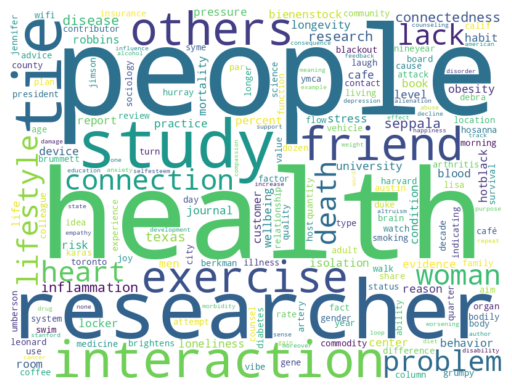

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#FONT_PATH = 'C:/Windows/Fonts/BROADW.ttf'
#FONT_PATH = "/System/Library/Fonts/영어폰트.ttc"

# wordcloud = WordCloud(max_font_size=200, width=800, height=600,
#                       background_color='white', font_path=FONT_PATH)

wordcloud = WordCloud(max_font_size=200, width=800, height=600,
                      background_color='white')

wordcloud.generate(' '.join(final_words))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("nytimes.png") # to save at the working folder


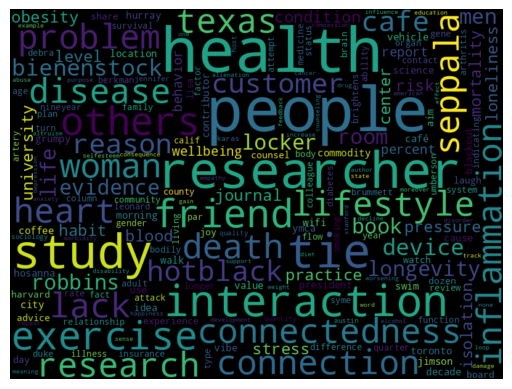

In [15]:
# FONT_PATH = 'C:/Windows/Fonts/FORTE.ttf'
# # 맥의 경우, /Library/Fonts 또는 /System/Library/Fonts

FONT_PATH = '/Library/Fonts'

# wordcloud = WordCloud(max_font_size=100, width=800, height=600,
#                       background_color='black',
#                       font_path=FONT_PATH)

wordcloud = WordCloud(max_font_size=100, width=800, height=600,
                      background_color='black')

wordcloud.generate(' '.join(final_words))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("nytimes.png") # to save at the working folder

원의 형태로 시각화 해보기

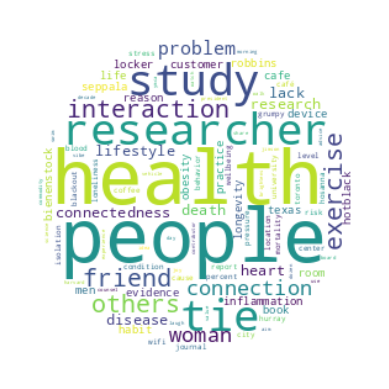

In [16]:
import numpy as np
x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color='white', repeat=True, mask=mask)
wc.generate(' '.join(final_words))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()
wc.to_file("circle.png")

마스크 이미지를 배경으로 시각화 하기

마스크에서 검은색 모양대로 텍스트 모양을 잡아주는 것. mask = image_mask

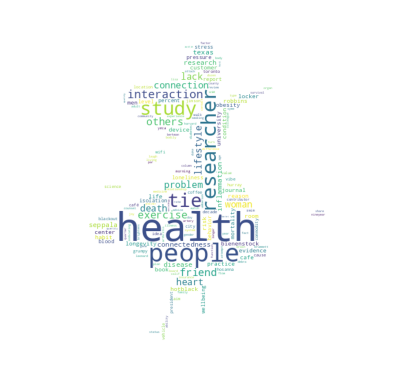

In [17]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud

# 마스크 이미지를 불러온 후, 넘파이의 어레이 형태로 변환합니다.
image_mask = np.array(Image.open("/content/drive/MyDrive/KOSSDA_텍스트마이닝_강의자료/강의자료/Day2/python_code/alice_mask.png"))
image_mask[image_mask>0]=255
# 숫자 0은 검은색을 255는 흰색을 의미
# 완전 흰색이 아닌 부분을 흰색으로 변환
# WordCloud는 완전 흰색이 아닌 부분을 mask 로 사용하기 때문

FONT_PATH = 'C:/Windows/Fonts/FORTE.ttf'

# WordCloud() 생성자 함수의 mask 파라미터를 해당 alice_mask로 지정합니다.
# wc1 = WordCloud(max_font_size=100, background_color="white",
#                 width=674, height=643,
#                 mask=image_mask,
#                 font_path = FONT_PATH)

wc1 = WordCloud(max_font_size=100, background_color="white",
                width=674, height=643,
                mask=image_mask)

# generate word cloud
wc1.generate(' '.join(final_words))

# store to file
wc1.to_file("../alice_wc.png")

plt.figure()
plt.imshow(wc1)
plt.axis("off")
plt.show()

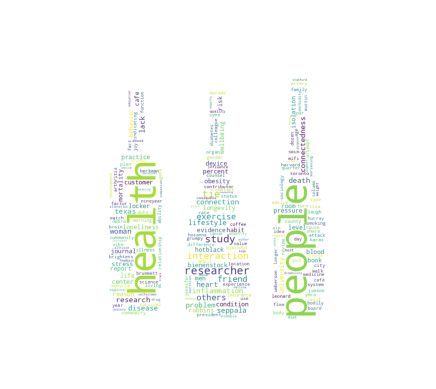

In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud

# 마스크 이미지를 불러온 후, 넘파이의 어레이 형태로 변환합니다.
image_mask = np.array(Image.open("/content/drive/MyDrive/KOSSDA_텍스트마이닝_강의자료/강의자료/Day2/python_code/bottle_mask.jpeg"))
image_mask[image_mask>0]=255
# 숫자 0은 검은색을 255는 흰색을 의미
# 완전 흰색이 아닌 부분을 흰색으로 변환
# WordCloud는 완전 흰색이 아닌 부분을 mask 로 사용하기 때문

FONT_PATH = 'C:/Windows/Fonts/FORTE.ttf'

# WordCloud() 생성자 함수의 mask 파라미터를 해당 alice_mask로 지정합니다.
# wc1 = WordCloud(max_font_size=100, background_color="white",
#                 width=674, height=643,
#                 mask=image_mask,
#                 font_path = FONT_PATH)
wc1 = WordCloud(max_font_size=100, background_color="white",
                width=674, height=643,
                mask=image_mask)

# generate word cloud
wc1.generate(' '.join(final_words))

# store to file
wc1.to_file("bottle_wc.png")

plt.figure()
plt.imshow(wc1)
plt.axis("off")
plt.show()